In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import pandas as pd
from scipy import stats

In [2]:
save_plot = False

plot_dir = 'plots/01/'
os.system('mkdir -p {}'.format(plot_dir))

0

In [3]:
# os.system('module load texlive') # load latex on vollmond

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "serif",
#     "font.serif": "Times",
    'axes.labelsize': 12,
    "legend.fontsize":11,
    "font.sans-serif": ["Helvetica"],
#    "text.latex.preamble": [r'"\usepackage{amsmath}"'],
})


# 1 PeV -> 1 TeV e_cut = 500 MeV

In [8]:
path = 'data/total_defl_moliere_1PeV_1TeV_ecut500/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [1, 2, 3, 4, 5]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

In [12]:
labels = [
    'G4+MSM',
    'vG+MSM',
    'MSM only',
    'vG',
    'G4'
]

0.05409841138396089 0.011164745659066038 0.1416452108955076
0.05692658700747404 0.013554442044933718 0.14363821010039962
0.047747036859156995 0.007515677127394285 0.12458467363955776
0.02236397615835723 0.005565813407415188 0.06922547964076646
0.016594758261266215 0.003860231259198508 0.06334472225031239


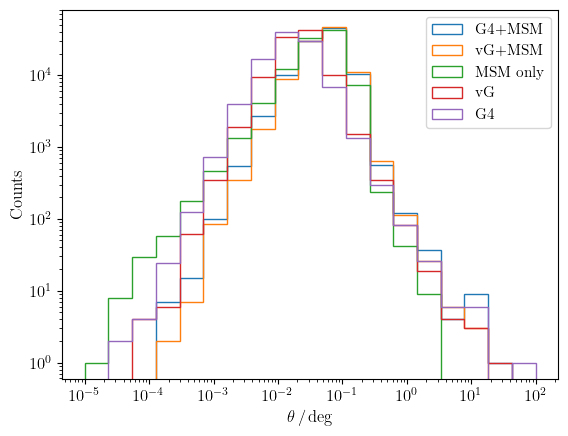

In [14]:
bins = np.logspace(-5, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()

# 1 PeV -> 1 TeV v_cut = 0.05

In [15]:
path = 'data/total_defl_moliere_1PeV_1TeV_vcut0_05/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [6, 7, 8, 9, 10]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

0.04180336366853189 0.009114906456988902 0.10873788001352096
0.044674814847096074 0.011080077908750843 0.11375244000939076
0.03761066079140764 0.0061001935246412795 0.09614808191310469
0.013015818742557016 0.0019082010357013893 0.06284067984804796
0.0068292303989426805 0.0007644731849981582 0.04882991558712735


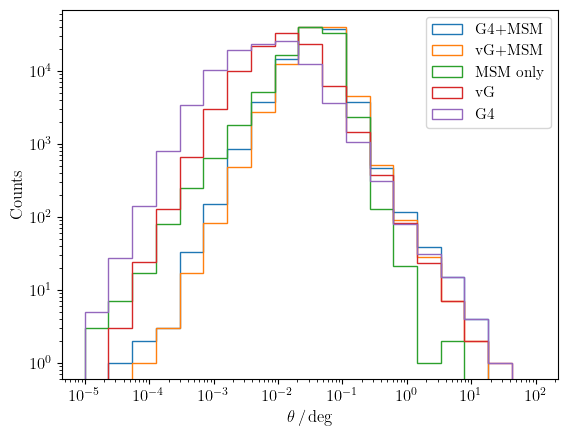

In [17]:
bins = np.logspace(-5, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()

# 1 PeV continuous E_f

In [32]:
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


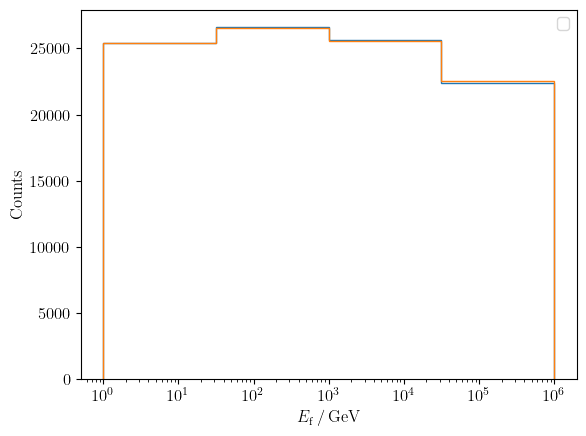

In [33]:
bins = np.logspace(0, 6, 5)
for i, df in enumerate(df_dict.keys()):
    plt.hist(df_dict[df].E_f, bins=bins, histtype='step')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel('Counts')
plt.legend()

0.03582245074399483 8.054891706290126e-05 1.246785817351563
0.04773067395625731 9.995972213200608e-05 1.441516259607793


Text(0, 0.5, 'Counts')

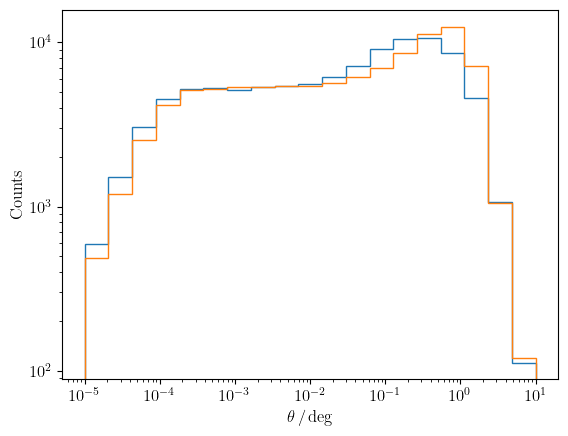

In [34]:
bins = np.logspace(-5, 1, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')

In [35]:
def paper_medians(x):
    return np.power(10, 0.0176 * x**3 + -0.2328 * x**2 + 0.0929 * x + 0.0726)

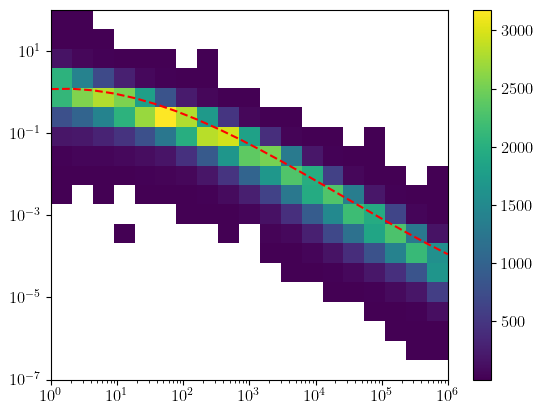

In [36]:
df = 'df_11'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)
plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

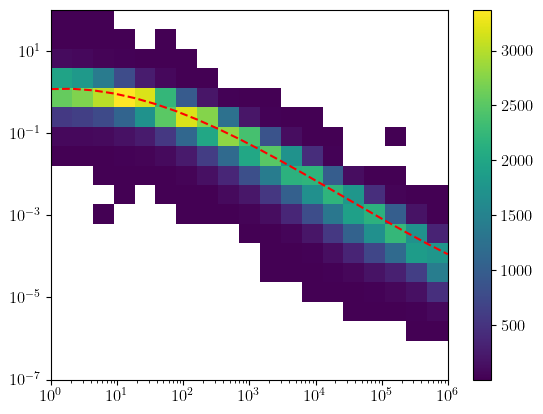

In [37]:
df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)
plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [38]:
def lower_int(x, level=0.99):
    return np.quantile(x, (1-level)/2)

def upper_int(x, level=0.99):
    return np.quantile(x, level + (1-level)/2)

[1.06853497e+00 9.93583031e-01 9.01656897e-01 7.13091473e-01
 5.37916323e-01 3.79131794e-01 2.47343000e-01 1.48690162e-01
 8.35030771e-02 4.37572043e-02 2.20308671e-02 1.09305539e-02
 5.37781414e-03 2.52980610e-03 1.29555193e-03 6.20681697e-04
 3.30523443e-04 1.74134246e-04 7.15490840e-05]
[8.41267835e-02 7.97968931e-02 6.12783573e-02 5.65279529e-02
 4.30680291e-02 2.79082103e-02 1.49916561e-02 8.35449121e-03
 2.79772273e-03 1.51246590e-03 7.82894864e-04 3.32874919e-04
 2.05239337e-04 7.68383182e-05 4.26288444e-05 2.26706882e-05
 1.35296699e-05 8.03259660e-06 0.00000000e+00]


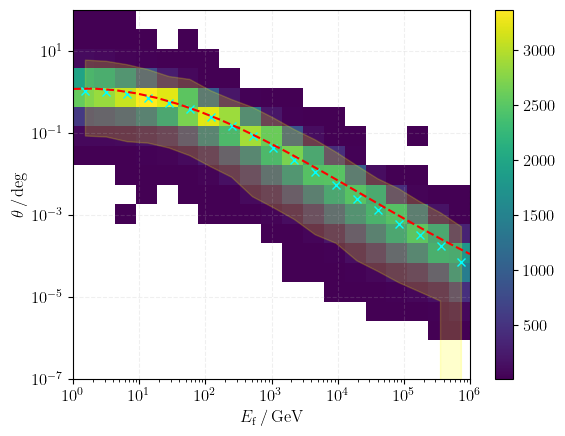

In [39]:
df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')
print(ret_lower.statistic)

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

In [28]:
df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(-8, 3, 20))
ret = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0], )
ret.statistic

array([1.06853497e+00, 9.93583031e-01, 9.01656897e-01, 7.13091473e-01,
       5.37916323e-01, 3.79131794e-01, 2.47343000e-01, 1.48690162e-01,
       8.35030771e-02, 4.37572043e-02, 2.20308671e-02, 1.09305539e-02,
       5.37781414e-03, 2.52980610e-03, 1.29555193e-03, 6.20681697e-04,
       3.30523443e-04, 1.74134246e-04, 7.15490840e-05])

# 10 TeV continuous E_f

In [29]:
path = 'data/total_defl_moliere_10TeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

[1.05363418 1.02081355 0.89080504 0.72192429 0.53636258 0.38054133
 0.25145861 0.15650829 0.08470128 0.03230735        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]


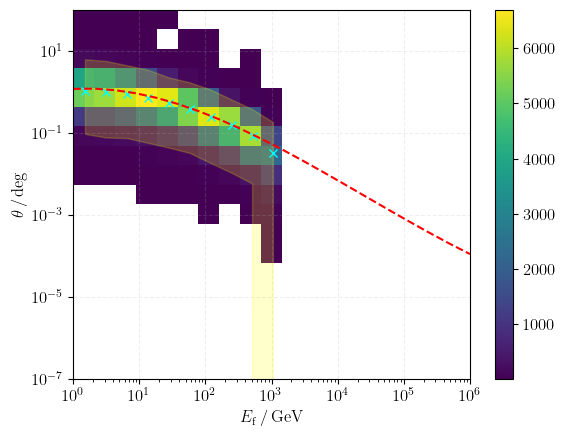

In [30]:
df = 'df_14'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')